# 푸아송 분포

아래 자료들을 참고하여 실습하면서 작성한 노트북입니다.

* [푸아송 분포](https://ko.wikipedia.org/wiki/%ED%91%B8%EC%95%84%EC%86%A1_%EB%B6%84%ED%8F%AC), 위키백과
* [푸아송 분포, 직관적으로 이해하기](https://danbi-ncsoft.github.io/study/2019/07/15/poisson.html), DANBI
* [확률 분포: 포아송 분포의 기본 탐구](https://fastercapital.com/ko/content/%ED%99%95%EB%A5%A0-%EB%B6%84%ED%8F%AC--%ED%8F%AC%EC%95%84%EC%86%A1-%EB%B6%84%ED%8F%AC%EC%9D%98-%EA%B8%B0%EB%B3%B8-%ED%83%90%EA%B5%AC.html), 2024.03.19, FasterCapital

## 푸아송 분포 수식

$$
Pois(k; \lambda) = \frac{\lambda^k}{k!} e^{-\lambda}
$$

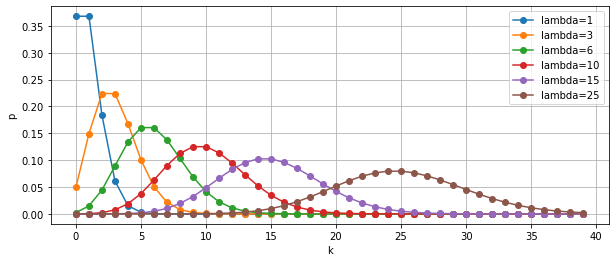

In [1]:
import math
import matplotlib.pyplot as plt

def poisson_distribution(lam, k):
    return pow(lam, k) / math.factorial(k) * pow(math.e, -lam)

def plot_pois(lam):
    legends = [f'lambda={m}' for m in lam]
    
    x = [i for i in range(40)]
    
    plt.figure(figsize=(10, 4))
    
    for m in lam:
        y = [poisson_distribution(m, k) for k in x]
        plt.plot(x, y, marker='o')

    plt.xlabel('k')
    plt.ylabel('p')
    plt.legend(legends)
    plt.grid(True)
    plt.show()

lambda_vals = [1, 3, 6, 10, 15, 25]
plot_pois(lambda_vals)

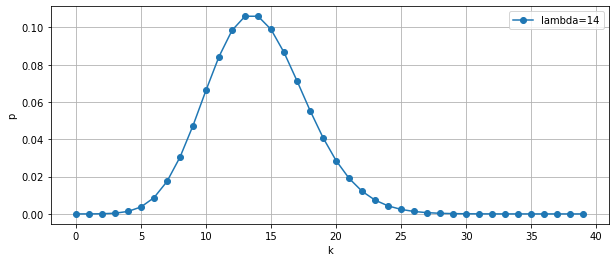

In [2]:
lambda_val = [14]
plot_pois(lambda_val)

## 이항 분포와의 관계

* 출처: [푸아송 분포](https://ko.wikipedia.org/wiki/%ED%91%B8%EC%95%84%EC%86%A1_%EB%B6%84%ED%8F%AC), 위키백과

푸아송 분포는 [이항 분포](https://ko.wikipedia.org/wiki/%EC%9D%B4%ED%95%AD_%EB%B6%84%ED%8F%AC)의 특수한 형태로 볼 수 있다.

$$
{\displaystyle X \sim {\textrm {B}}(n,p).}
$$

이항분포를 따르는 위와 같은 확률변수 $X$에서, <font color='red'>$n$이 대단히 크고 $p$가 대단히 작을 경우</font>, 이 확률변수 $X$는 $λ=np$인 푸아송 분포로 근사할 수 있다.

예를 들어 DNA에 방사선을 쬐었을 때, 각 염기쌍이 돌연변이를 일으킬 확률은 각각 매우 작고 서로 독립적이다. 또한 하나의 DNA에는 많은 염기쌍이 있다. 따라서 DNA에 방사선을 쬐었을 때 발생하는 돌연변이의 개수는 푸아송 분포로 나타낼 수 있다.

$$
{\displaystyle X \sim {\textrm {Pois}}(np).\,}
$$

## 이항 분포로부터 푸아송 분포 유도

이항 분포에서 기댓값은 다음과 같습니다.

$$
\lambda = np
$$

이제 시행 횟수를 무한히 크게 함으로써 이항 분포로부터 푸아송 분포를 유도해 봅니다.

$$
\begin{equation} \label{eq1}
\begin{split}
\lim_{n \to \infty} B(k;n,p) & = \lim_{n \to \infty} {n \choose k} p^k (1-p)^{n-k} \\
                             & = \lim_{n \to \infty} \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k} \\
                             & = \lim_{n \to \infty} \left[\frac{n!}{n^k (n-k)!}\right] \left[\frac{\lambda^k}{k!}(1 - \frac{\lambda}{n})^n\right] \left[(1 - \frac{\lambda}{n})^{-k}\right] \\
                             & \qquad\qquad(가) \qquad\qquad\qquad\qquad\qquad(나) \\
                             & = \lim_{n \to \infty} [1] \left[\frac{\lambda^k}{k!}(1 - \frac{\lambda}{n})^n\right] [1] \\
                             & = \frac{\lambda^k}{k!} \lim_{n \to \infty} (1 - \frac{\lambda}{n})^n \\
                             & = \frac{\lambda^k}{k!} e^{- \lambda} \\
                             & = Pois(\lambda)
\end{split}
\end{equation}
$$

위의 유도 과정에서 (가), (나)에 대해 다음의 극한값을 사용했습니다.

$$
\lim_{n \to \infty} \frac{n!}{n^k (n-k)!} = \lim_{n \to \infty} \frac{n}{n} \cdots \frac{n - (k-1)}{n} = 1
$$

$$
\lim_{n \to \infty} (1 - \frac{\lambda}{n})^{-k} = (1 - 0)^{-k} = 1
$$

그리고 다음은 자연상수 $e$의 정의로부터 얻습니다.

$$
e^{-\lambda} = \lim_{n \to \infty} (1 - \frac{\lambda}{n})^n
$$

## 푸아송 분포 사례

### 일정 주어진 시간 동안에 도착한 고객의 수


### 어떤 특정 량의 방사선을 DNA에 쬐였을 때 발생하는 돌연변이의 수 

이와 관련된 사례로 아래 기사의 내용 중 일부를 인용합니다.

* [방사선은 몸속 DNA 얼마나, 어떻게 변화시킬까?](https://www.doctorsnews.co.kr/news/articleView.html?idxno=153414), 2024.02.15, 의협신문

  ![](https://www.doctorsnews.co.kr/news/photo/202402/153414_119876_435.jpg)

  > 1Gy(그레이)의 방사선량은 매 세포마다 약 14개 안팎의 돌연변이를 만들어 내는 것으로 나타났다(그림 2).

그리고 인간의 [염기쌍](https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%A0%84%EC%B2%B4_(%EC%83%9D%EB%AA%85%EA%B3%BC%ED%95%99)) 수는 대략 33억개라고 합니다. 이러한 내용들을 푸아송 분포의 관점에서 정리하면 다음과 같습니다.

* 염기쌍 수는 시행 횟수에 해당하고 각각의 시행은 독립적임
* 시행 횟수 $n$이 매우 큼
* 돌연변이는 사건 발생이고 발생 횟수 $k$는 $n$에 비해 매우 작음
* 돌연변이 발생 평균 값은 14

위에서 <font color='red'>정확한 염기쌍 수를 모르기 때문에 $n$을 정할 수 없고 이로 인해 $p$도 정할 수 없습니다</font>. 관찰을 통해 평균적으로 14개의 돌연변이가 발생했다는 것을 알았고 사례의 특성을 고려하면 푸아송 분포를 따른다고 볼 수 있으므로 푸아송 분포 수식의 $\lambda$ 값은 14가 됩니다. 따라서 <font color='red'>1Gy(그레이)의 방사선량을 매 세포마다 쬐였을 때 세포당 발생하는 돌연변이 개수의 확률 분포</font>는 다음과 같아집니다.

$$
Pois(k;14) = \frac{14^k}{k!} e^{-14}
$$